In [1]:
import pickle 
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np

In [38]:
dataset = 'multi_polarity_books'
# dataset = 'multi_polarity_dvd'
# dataset = 'multi_polarity_electronics'
# dataset = 'multi_polarity_kitchen'

methods = ['greedy', 'parzen', 'lime','emap_low']
metrics = ['recalls', 'fps']
algorithm = 'l1logreg'

precision = {}
recall = {}

for m in methods:
    recall_file = "results/" + dataset + "_" + m + "_recalls"
    with open(recall_file, 'rb') as f:
        load_result = pickle.load(f)
    recall[m] = [np.mean(data[dataset][algorithm]) for data in load_result]

    fp_file = "results/" + dataset + "_" + m + "_fps"
    with open(fp_file, 'rb') as f:
        load_result = pickle.load(f)
    precision[m] = [1.0 - np.mean(data[dataset][algorithm]) for data in load_result]

No handles with labels found to put in legend.


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

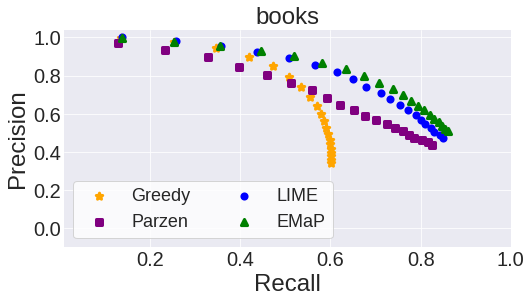

In [39]:
plt.figure(figsize = (8,4))
plt.scatter(recall[methods[0]], precision[methods[0]], 
            c ="orange", 
            linewidths = 3,
            marker ="*",
            s = 45)
plt.scatter(recall[methods[1]], precision[methods[1]], 
            c ="purple", 
            linewidths = 3,
            marker ="s",
            s = 30)
plt.scatter(recall[methods[2]], precision[methods[2]], 
            c ="blue", 
            linewidths = 3,
            marker ="o",
            s = 26)
plt.scatter(recall[methods[3]], precision[methods[3]], 
            c ="green", 
            linewidths = 3,
            marker ="^",
            s = 38)
# plt.scatter(recall[methods[3]], precision[methods[3]], 
#             c ="red", 
#             marker ="s",
#             s = 25)
plt.legend()
plt.xlim([0.01, 1])
plt.ylim([-0.1, 1.04])
plt.xlabel("Recall", fontsize = 24)
plt.ylabel("Precision", fontsize = 24)
plt.title(dataset[15:], fontsize = 24)
legend_drawn_flag = True
plt.legend(['Greedy', 'Parzen', 'LIME', 'EMaP'],  fontsize = 18,  loc=0, 
           frameon=legend_drawn_flag, facecolor = 'white',
           ncol=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)